In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams["font.family"] = "Times New Roman"


from functional import get_data, process, clean_df, add_counts, analyze_most_different 

## how gender clues are implied within the contents recommended by Spotify’s recommender systems in terms of the graphical user interface, and the presentation of playlists on the home screen, based on personalized recommendation patterns
</br>

### How are gender ideologies implied within the recommended playlists and their organization on Spotify

### Preparation:
Reading files</br>
Cleaning data

In [2]:
full_male, full_female = get_data()

# Creating subsets from the data to work with
male, female = process(full_male), process(full_female)

# Clean all data by removing trailing whitespaces and lowercasing all letters
female = add_counts(clean_df(female.copy()))
male = add_counts(clean_df(male.copy()))

len(male), len(female)
male = male[male['type'] == 'playlist']
female = female[female['type'] == 'playlist']

Now that data is clean, textual analysis can begin

### Simple stats, which are the most common playlists each user received?

In [3]:
len(male[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False))

347

237
3752


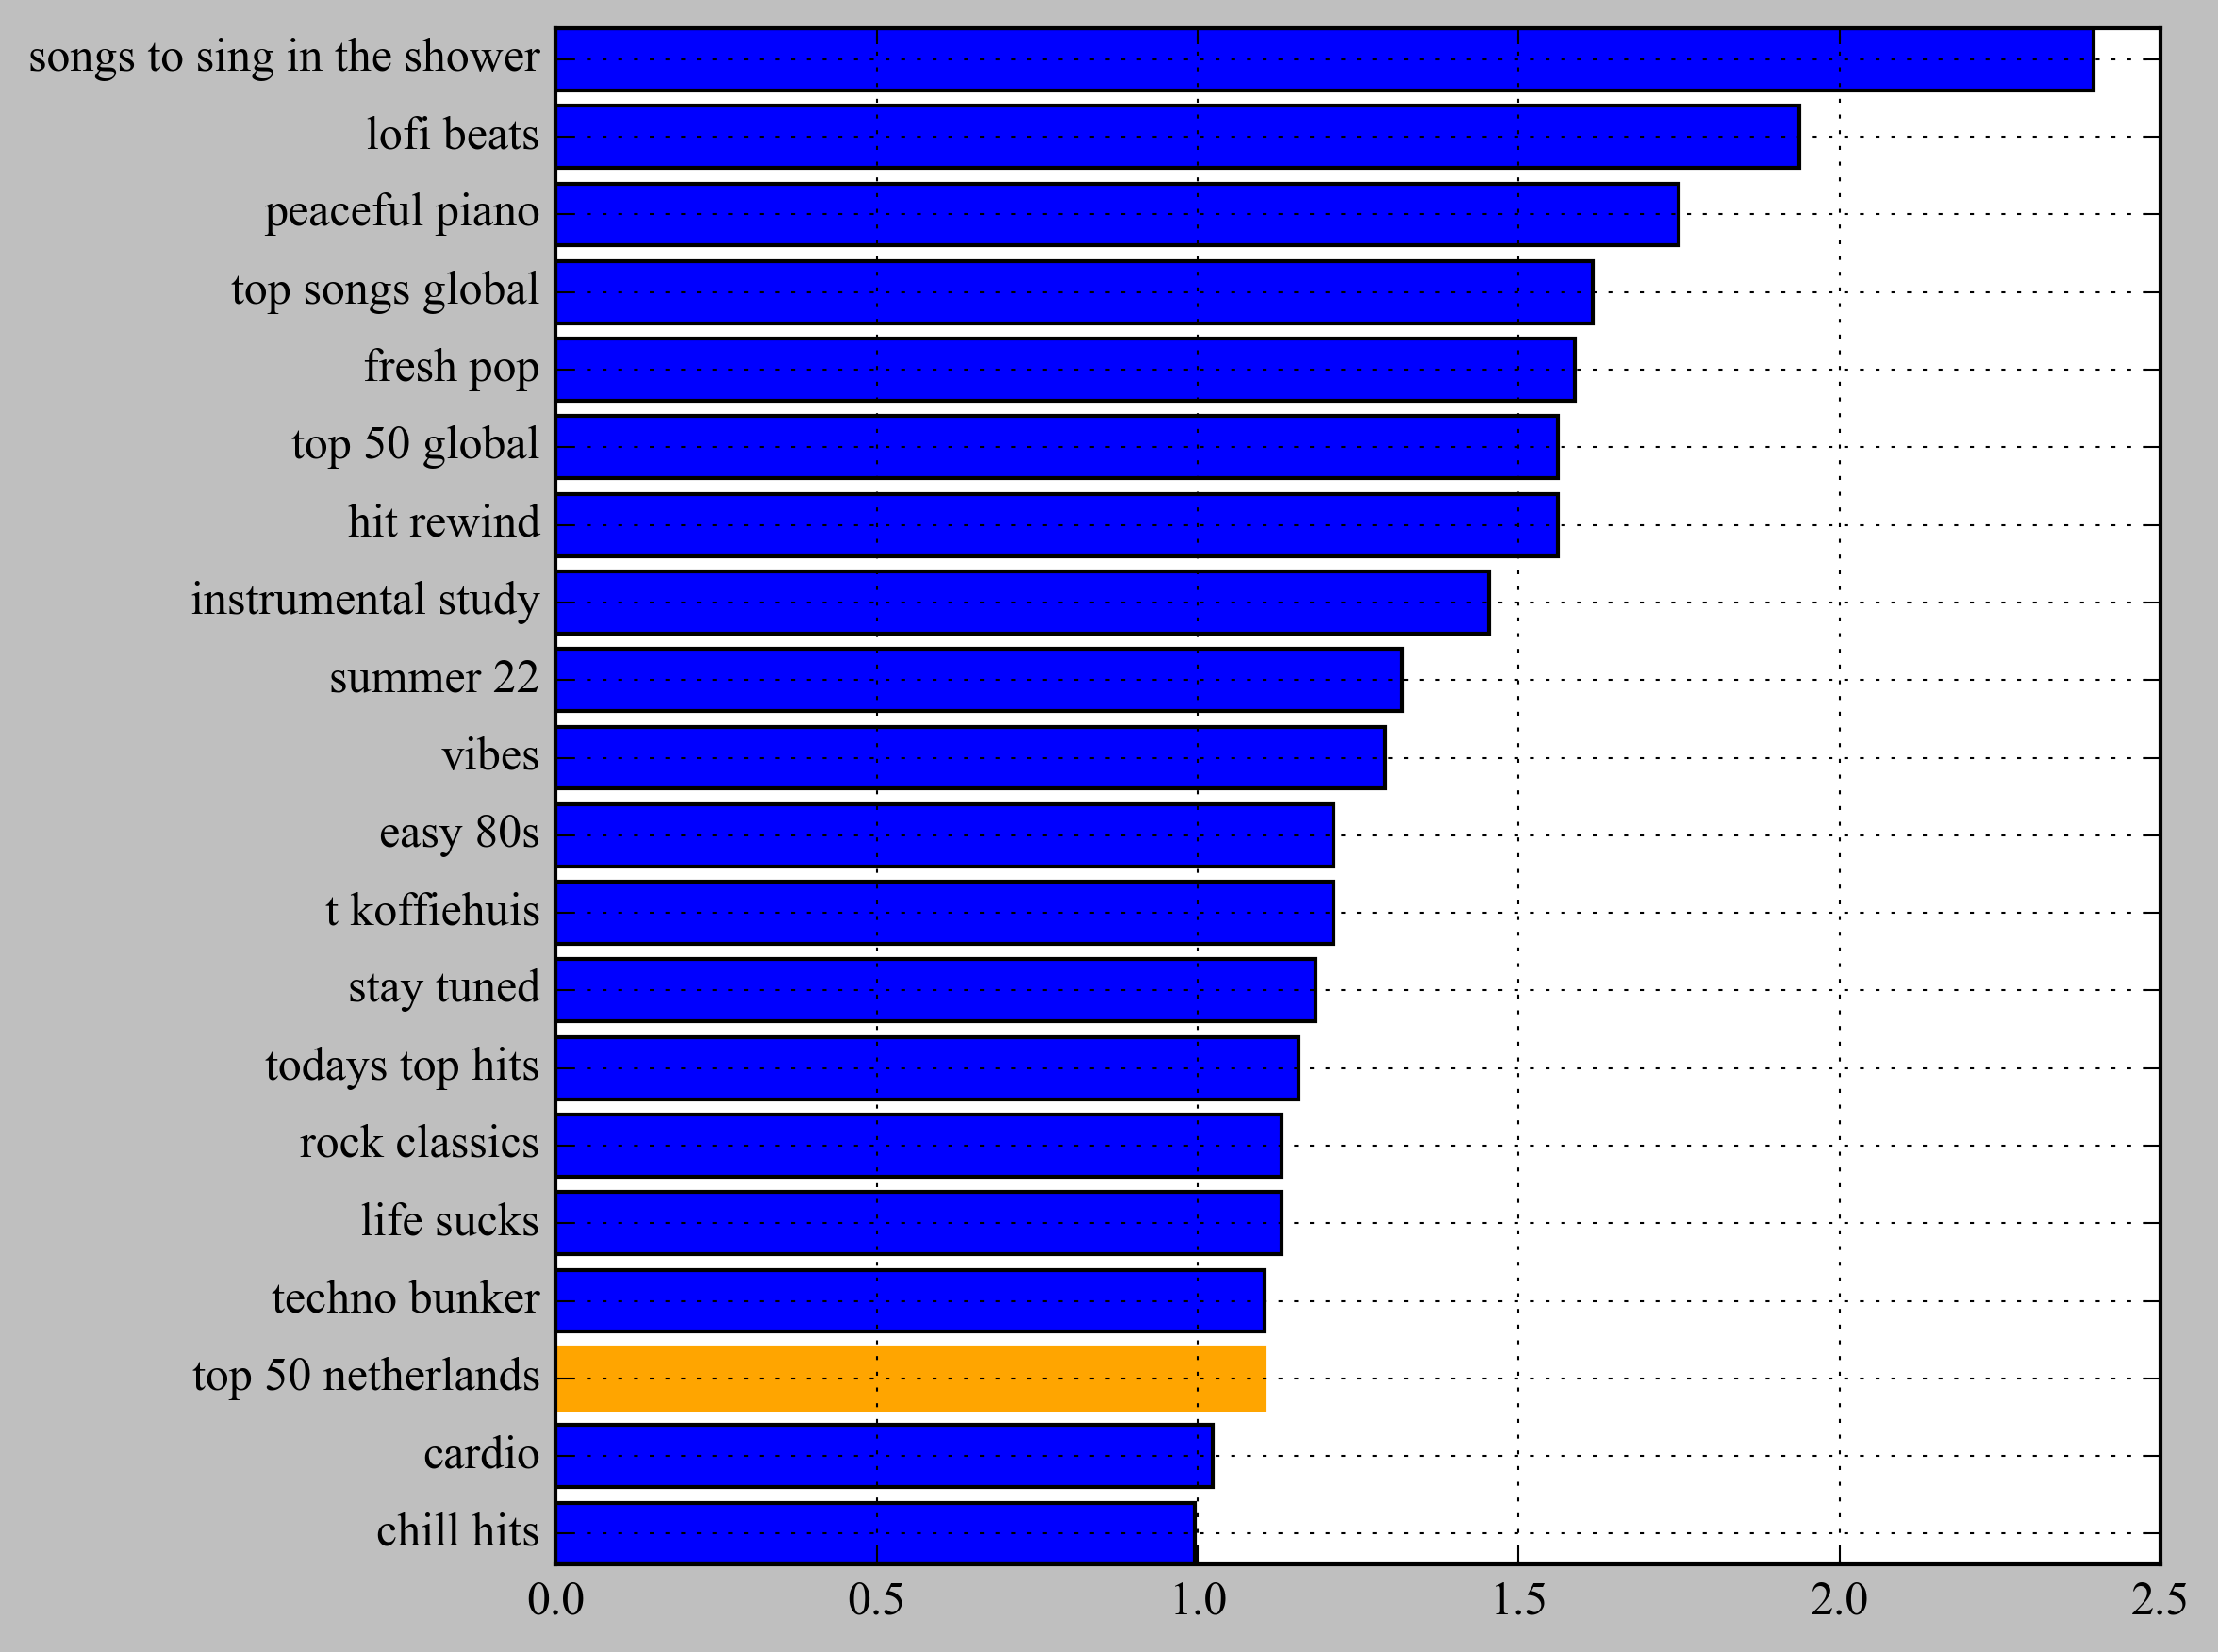

In [4]:
plotdf = female[female['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)#.head(20)

print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf=plotdf.head(20)

plt.figure(dpi=300)
bar = plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(female))*100)
bar[-3].set_color('orange')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.savefig('data/femaletop20.png')
plt.show()

347
3413


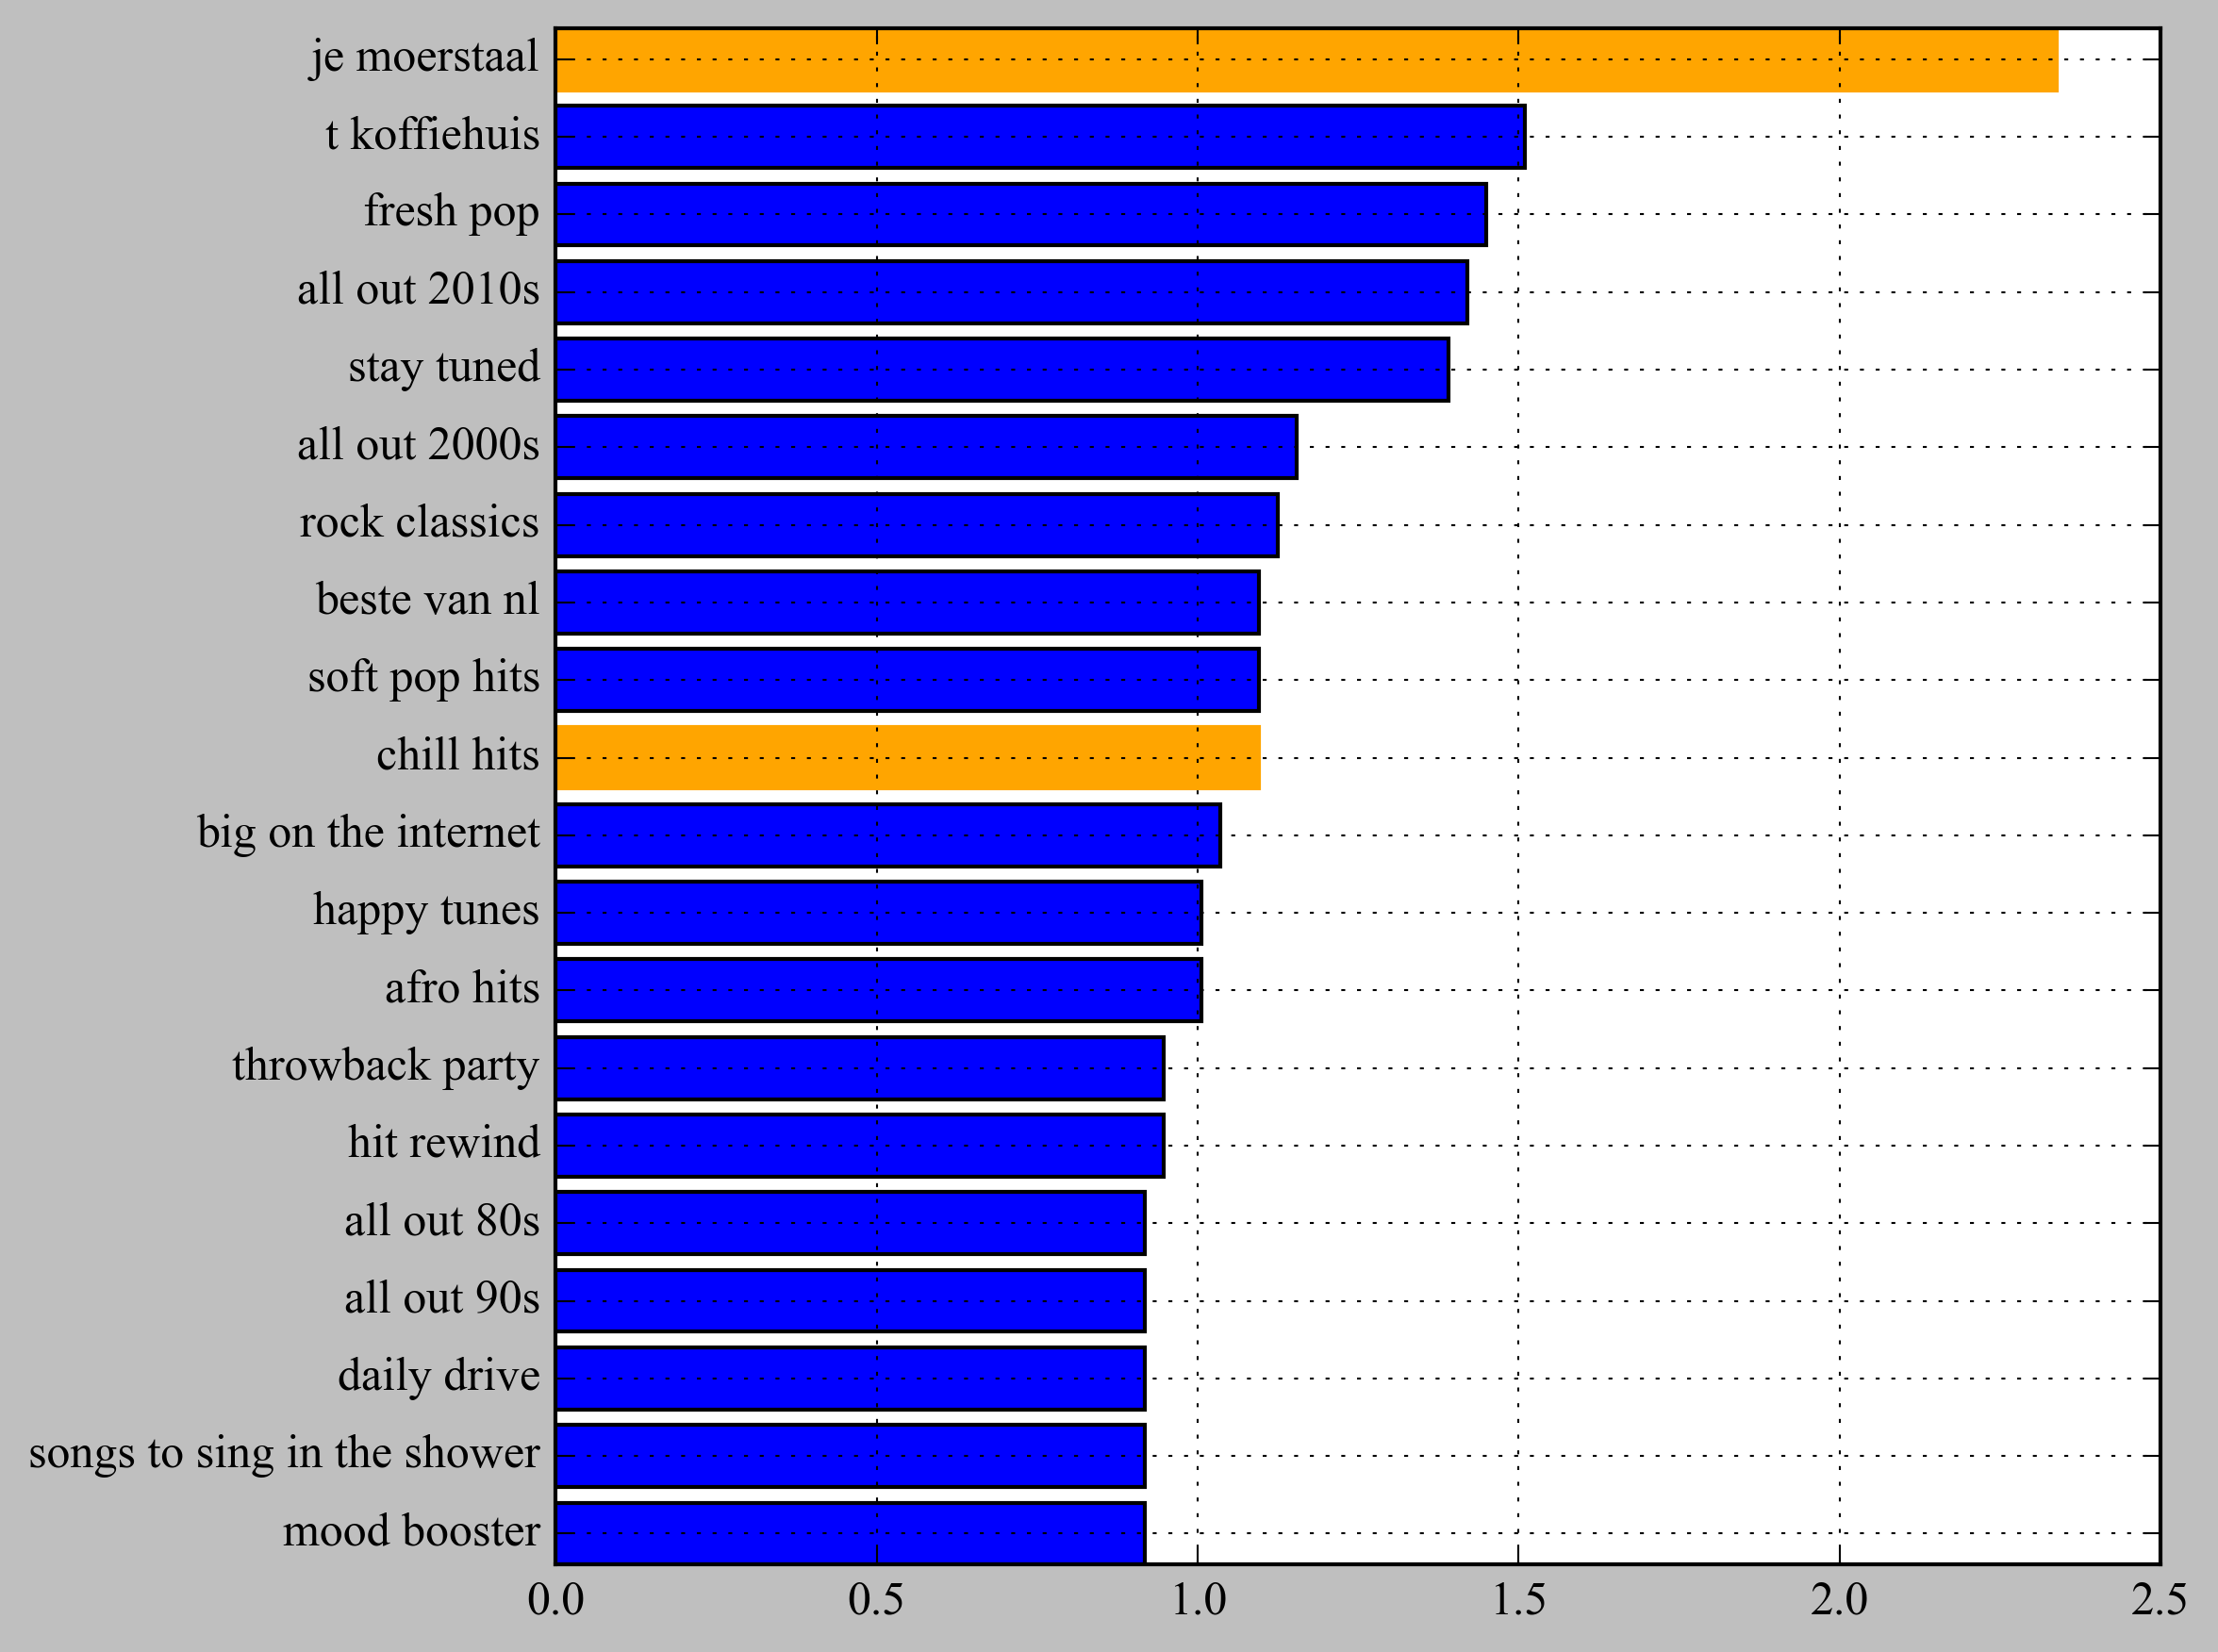

In [5]:
plotdf = male[male['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)
print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf = plotdf.head(20)

plt.figure(dpi=300)
bar = plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(male))*100)
bar[0].set_color('orange')
bar[9].set_color('orange')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

### Dutch Playlists

In [6]:
dutchm = ['je moerstaal', 'beste van nl', 'woordenschat', 'made in nl', 'beste van woordenschat', '80s beste nltalig', '60s beste nltalig', '70s beste nltalig', 'de jeugd', '00s beste nltalig', '90s beste nltalig', 'de hits uit 2016', 'top 50 netherlands', 'de hits uit 2010', 'de hits uit 2012', 'de hits uit 2019', 'de hits uit 2014', '10s beste nltalig', 'karakter', 'new music friday nl', '10s allerbeste', 'de hits uit 2017', 'equal netherlands', 'de hits uit 2015', 'de hits uit 2013', 'viral 50 netherlands', 'top songs netherlands']
dutchf = ['top songs netherlands', 'top 50 netherlands', 'beste van nl', 'viral 50 netherlands', 'je moerstaal', 'viral hits nl', 'new music friday nl', 'hot hits nl', 'woordenschat', 'zomerhits 20102020', '10s allerbeste', 'de hits uit 2016', 'de hits uit 2019', 'beste van woordenschat', '10s beste nltalig', 'de hits uit 2018']


femc=0
for x in dutchf:
    femc += int(female['playlist count'].loc[female['playlist name'] == x].unique())

mamc=0
for y in dutchm:
    #display(male.loc[male['playlist name'] == y].drop_duplicates())
    mamc += int(male['playlist count'].loc[male['playlist name'] == y].unique())

# Amount of dutch playlists recommended out of all playlists ever recommended
(mamc/len(male.loc[male['type']=='playlist']))*100, (femc/len(female.loc[female['type']=='playlist']))*100


(7.812962414915655, 8.909825033647376)

In [7]:
# Amount of dutch playlists out of all playlists
(len(dutchm)/len(male['playlist name'].loc[male['type']=='playlist'].unique()))*100, (len(dutchf)/len(female['playlist name'].loc[female['type']=='playlist'].unique()))*100

(7.780979827089338, 6.751054852320674)

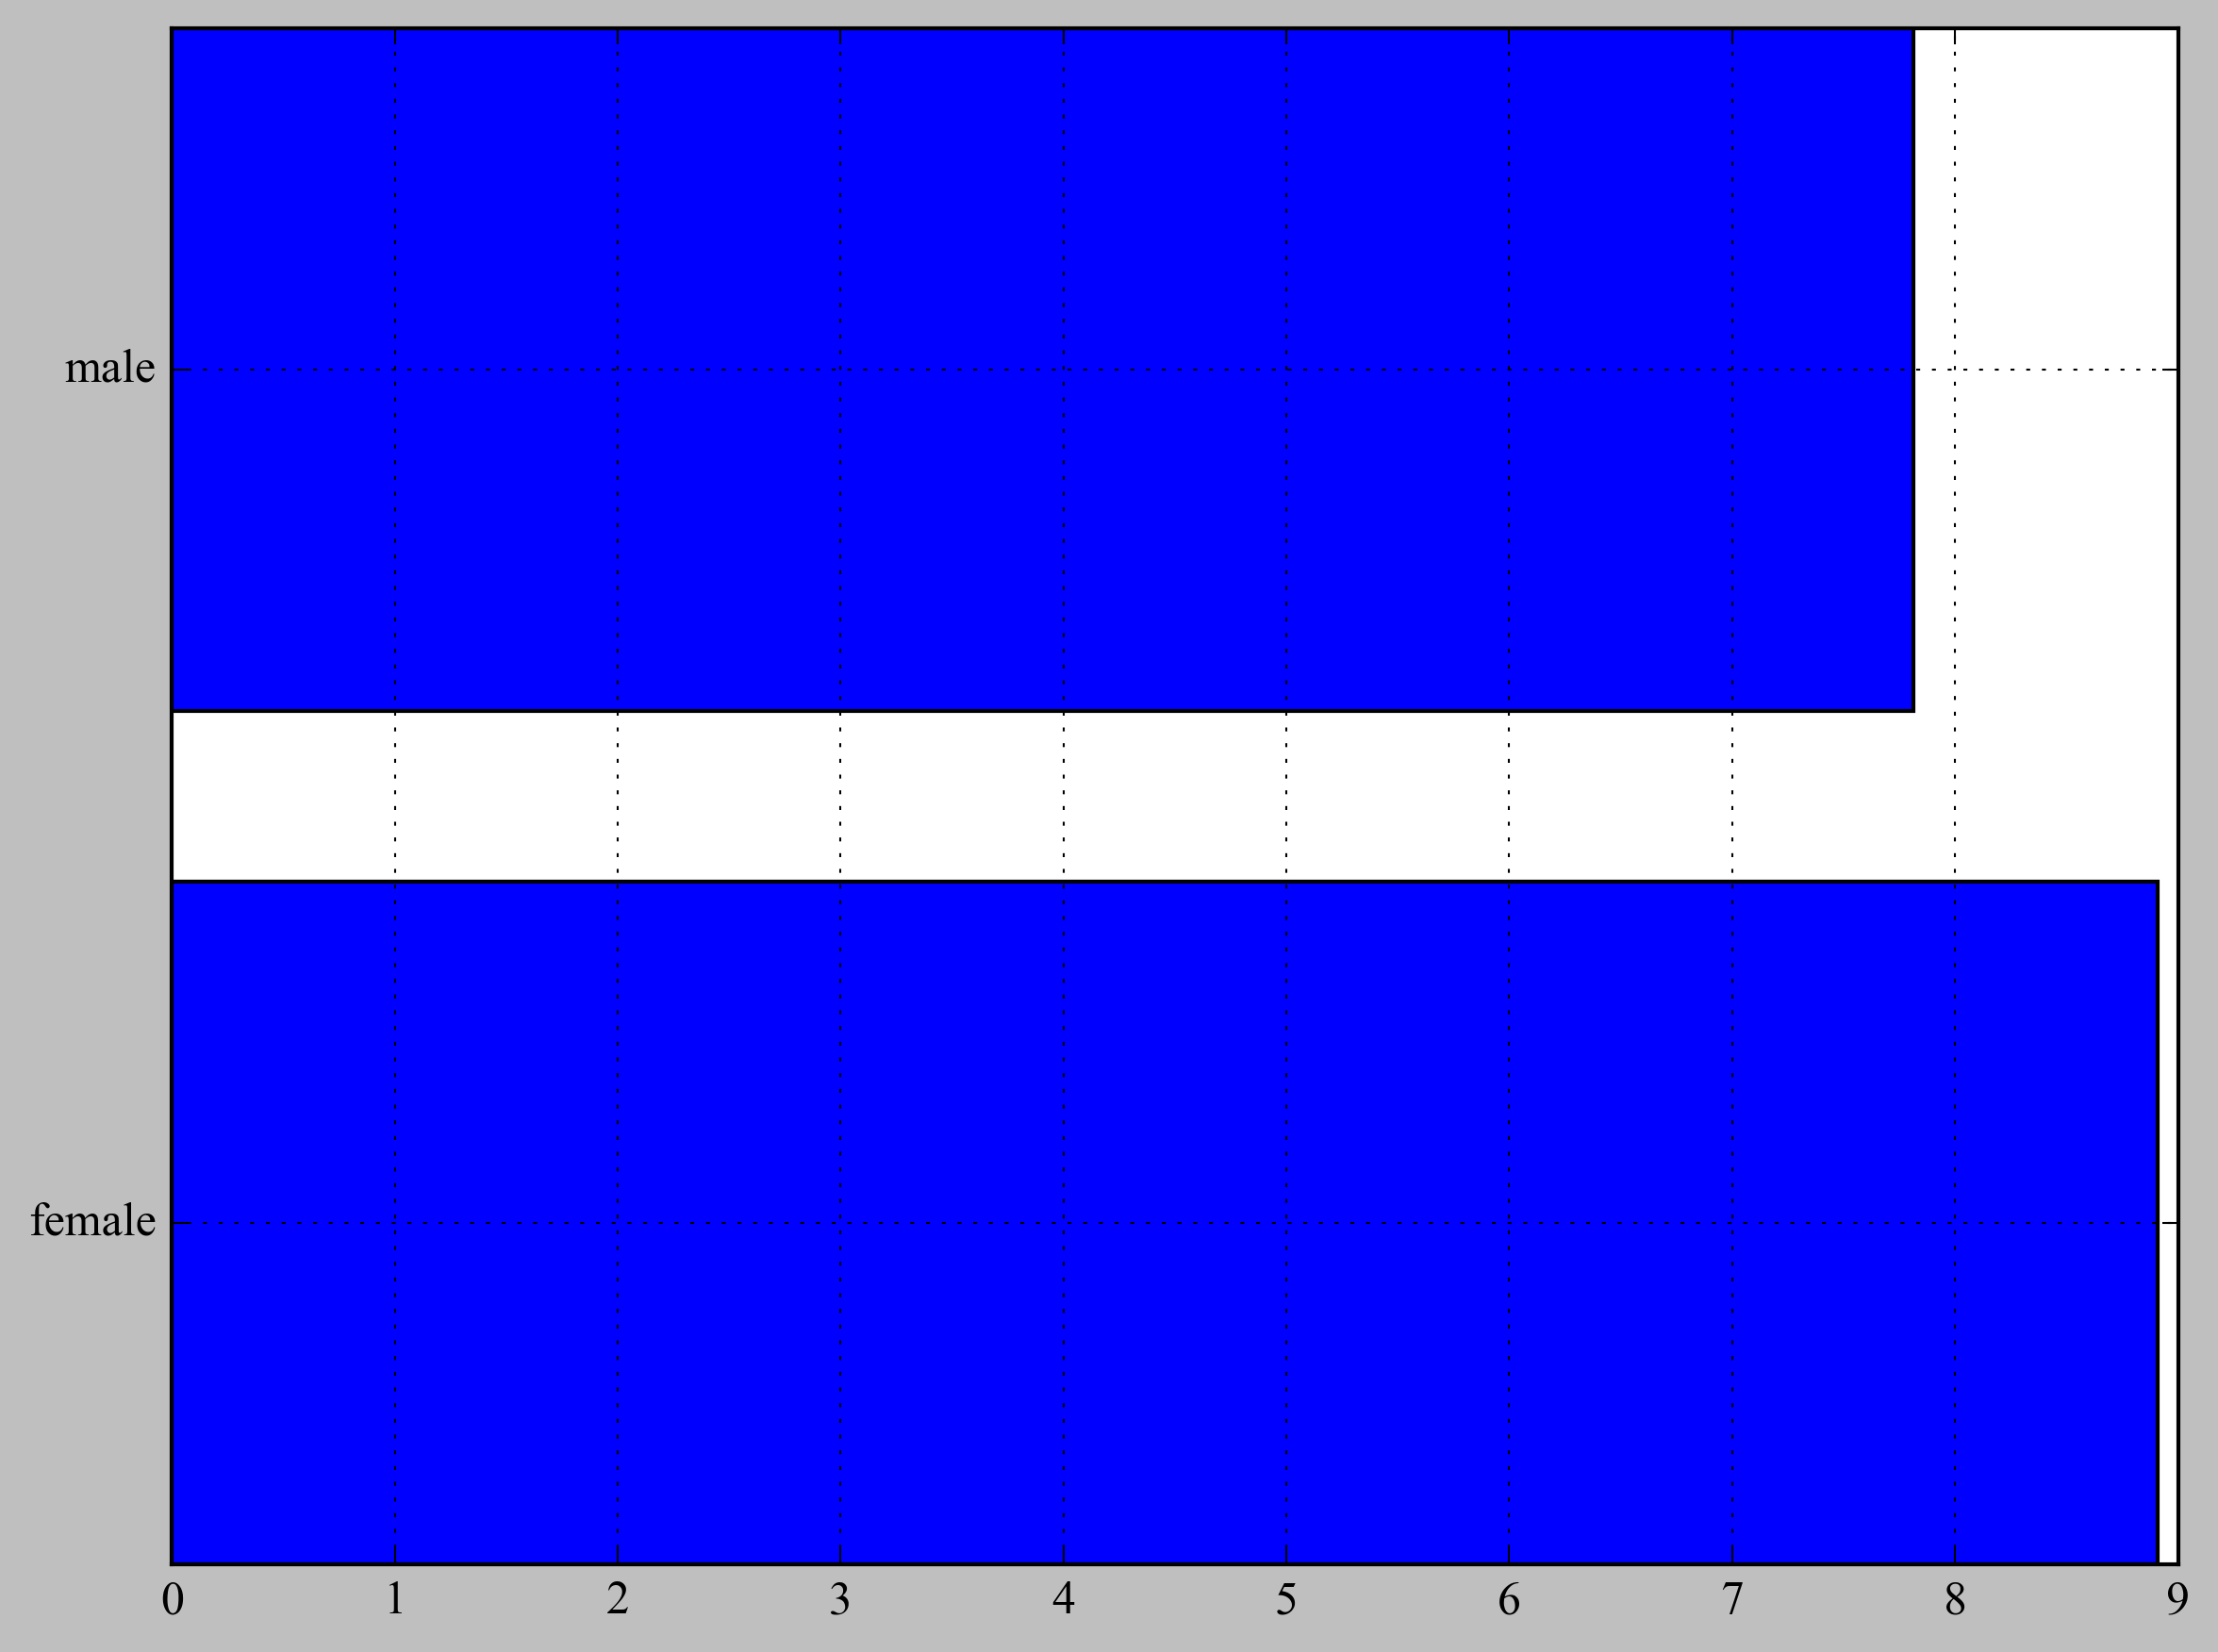

In [8]:
# Dutch playlist count
mf = [(mamc/len(male))*100, (femc/len(female))*100]

plt.figure(dpi=300)
plt.barh(['male', 'female'], mf)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

### Similarities:
Find which playlists both users got recommended

In [9]:
# Check which playlists both users have in common
similar_playlists = male[male['playlist name'].isin(female['playlist name'])]
similar_playlists = similar_playlists[similar_playlists.type == 'playlist']
#similar_playlists

In [10]:
# Which playlists only one of both users gets recommended to
diff = pd.concat([male[~male['playlist name'].isin(female['playlist name'])], 
    female[~female['playlist name'].isin(male['playlist name'])]])
diff = diff[diff.type == 'playlist']

### Finding which are the most appearing playlists only one of both users were recommended

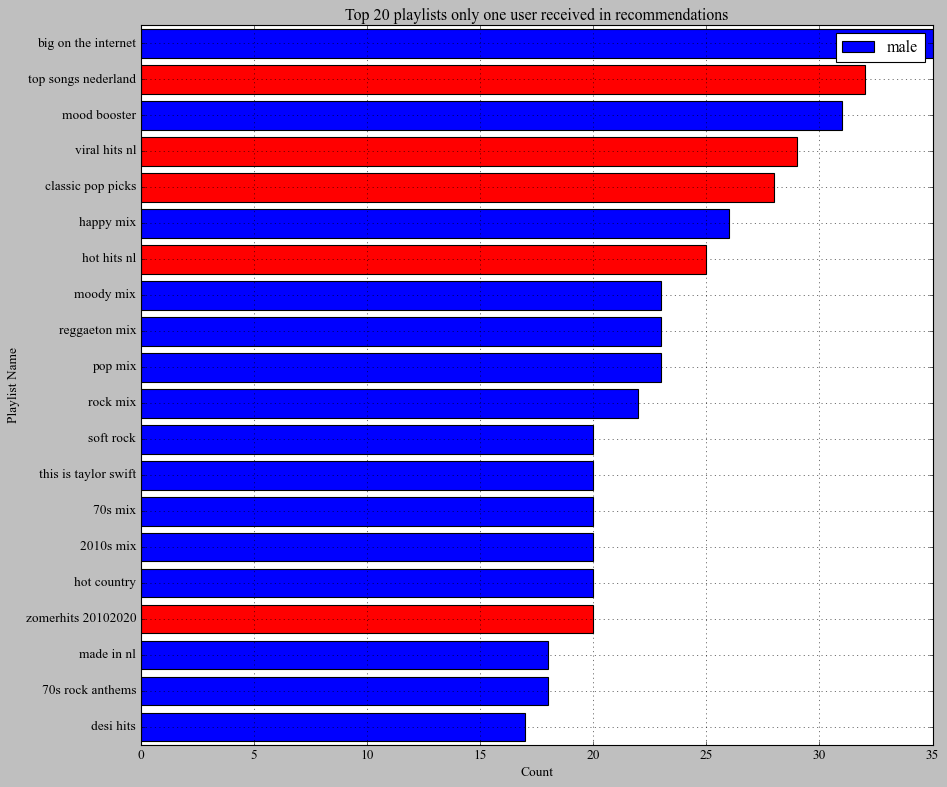

In [11]:
most_different = dict(Counter(diff['playlist name']).most_common(20))
male_unique = male['playlist name'].unique()

analyze_most_different(most_different, male_unique, feature=False)

In [12]:
# Looking for the most common recommended playlists per user
m = dict(Counter(male['playlist name']).most_common())
mdf = pd.DataFrame({'male': m.keys(), 'count': (v/len(male)*100 for v in m.values())})

f = dict(Counter(female['playlist name']).most_common())
fdf = pd.DataFrame({'female': f.keys(), 'count': (v/len(female)*100 for v in f.values())})

display(mdf.head(), fdf.head())

,male,count
0,je moerstaal,2.337970
1,t koffiehuis,1.509322
2,fresh pop,1.450133
3,all out 2010s,1.420539
4,stay tuned,1.390944


,female,count
0,songs to sing in the shower,2.395693
1,lofi beats,1.938089
2,peaceful piano,1.749664
3,top songs global,1.615074
4,fresh pop,1.588156


### Looking for the difference between how often male vs female user received certain playlists

In [13]:
most_common_playlists = {
    'male': dict(Counter(male['playlist name']).most_common()), 
    'female': dict(Counter(female['playlist name']).most_common())
}

# Fill all playlists only one user gets recommended
new = pd.DataFrame(most_common_playlists).fillna(0)

# Get difference
new['diff'] = abs(new['male'] - new['female'])

# Sort
new.sort_values(by = 'diff', ascending=False, inplace=True)
new.head()

,male,female,diff
lofi beats,11.0,72.0,61.0
songs to sing in the shower,30.0,89.0,59.0
top songs global,2.0,60.0,58.0
top 50 global,2.0,58.0,56.0
peaceful piano,11.0,65.0,54.0


### Differences in playlist recommendations between both users

Tagging times after morning, afternoon and evening

In [14]:
# Counting workout playlists
display(pd.DataFrame(Counter(female['playlist name'][female['hub name'] == 'workout']).most_common()))
display(pd.DataFrame(Counter(male['playlist name'][male['hub name'] == 'workout']).most_common()))

,0,1
0,power hour,33
1,top hits workout,32
2,beast mode,32
3,fun run,32
4,motivation mix,32
5,workout,32
6,cardio,32
7,run this town,32
8,power workout,30
9,yoga meditation,16


,0,1
0,motivation mix,10
1,fun run,10
2,power hour,10
3,run this town,10
4,top hits workout,9
5,power workout,9
6,cardio,9
7,workout,8
8,beast mode,7
9,fast pop run,6


In [15]:
print(dict(Counter(male['playlist name'][male['hub name'] == 'mood']).most_common()).keys(),'\n',
dict(Counter(female['playlist name'][female['hub name'] == 'mood']).most_common()).keys())

dict_keys(['t koffiehuis', 'you  me', 'calm before the storm', 'easy on sunday', 'feelin myself', 'feeling good feeling great', 'happy tunes', 'chill hits', 'peaceful piano', 'life sucks', 'lofi beats', 'broken heart', 'latin pop classics']) 
 dict_keys(['life sucks', 'broken heart', 'peaceful piano', 'instrumental study', 'vibes', 't koffiehuis', 'happy tunes', 'chill hits', 'songs to sing in the shower', 'lofi beats', 'easy 80s', 'techno bunker', 'all the feels', 'intense studying', 'soft pop hits'])


Differences between how often female vs male received lo-fi beats and life sucks

In [16]:
print(len(male[male['playlist name'] =='life sucks']), len(female[female['playlist name'] =='life sucks']))
print(len(male[male['playlist name'] =='lofi beats']), len(female[female['playlist name'] =='lofi beats']))

12 42
11 72


# Hubs

In [19]:
female_hubs = female[['day', 'time', 'hub name']]
female_hubs = female_hubs.drop_duplicates()
female_hubs = female_hubs.reset_index().drop('index', axis=1)
female_hubs['hub count'] = female_hubs.groupby('hub name')['hub name'].transform('count')
female_hubs['hub percent'] = pd.to_numeric((female_hubs['hub count']/len(female_hubs))*100)

In [20]:
with open('functional/hub_category.json', 'r') as f:
    file = json.load(f)

other = set(file['other'])
moods = set(file['moods_and_activities'])
genres = set(file['genres'])
for_you = set(file['for_you'])
trends = set(file['trends'])
more_like_playlists = set(file['more_like_playlists'])
more_like_artists = set(file['more_like_artists'])
recommended = set(file['recommended'])

hub_labels = ['trends','moods and activities','genres','more like artists','more like playlists','recommended','for you','other']

hub_colors = ['C0','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

In [21]:
# Create tags for female

conditions=[
    (female['hub name'].isin(trends)),
    (female['hub name'].isin(moods)),
    (female['hub name'].isin(genres)),
    (female['hub name'].isin(more_like_artists)),
    (female['hub name'].isin(more_like_playlists)),
    (female['hub name'].isin(recommended)),
    (female['hub name'].isin(for_you)),
    (female['hub name'].isin(other))
]

female['hub_category'] = np.select(conditions, hub_labels)

In [22]:
# Create tags for male

conditions=[
    (male['hub name'].isin(trends)),
    (male['hub name'].isin(moods)),
    (male['hub name'].isin(genres)),
    (male['hub name'].isin(more_like_artists)),
    (male['hub name'].isin(more_like_playlists)),
    (male['hub name'].isin(recommended)),
    (male['hub name'].isin(for_you)),
    (male['hub name'].isin(other))
]

male['hub_category'] = np.select(conditions, hub_labels)

In [23]:
female.groupby('hub_category')['hub_category'].count()
male.groupby('hub_category')['hub_category'].count()

hub_category
for you                 765
genres                  630
moods and activities    969
more like artists       408
other                    22
recommended              89
trends                  496
Name: hub_category, dtype: int64

In [31]:
# Find a way to connect the labels to specific colors
colors = ['#069af3','#5edc1f','yellow','orange','violet','brown','red','grey']

def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0.1 else ''


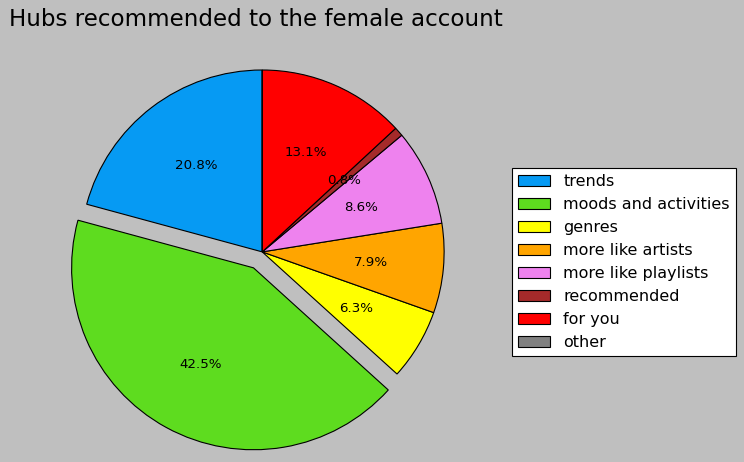

In [32]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cats = female.groupby('hub_category')['hub_category'].count()
cats_labels = list(cats.keys())
labels = hub_labels
sizes = [cats[cats_labels.index(v)] if v in cats_labels else 0 for v in hub_labels]
explode = [0.1 if m == max(sizes) else 0 for m in sizes]

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the female account', loc='center', size='xx-large', pad=40)
wedges, texts, autotexts = ax1.pie(sizes, autopct=my_autopct, startangle=90, textprops={'color':"black"}, explode=explode, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1), labelcolor='k')

plt.savefig('data/visual/female_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

According barplots

In [33]:
def barplot_hubs(cats, person):
    plt.rcParams['axes.facecolor'] = 'white'
    #plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
    cats_labels = list(cats.keys())
    labels = hub_labels
    sizes = [cats[cats_labels.index(v)] if v in cats_labels else 0 for v in hub_labels]

    # Create barplot
    bar = plt.barh(labels, [round((s/sum(sizes))*100, 2) for s in sizes], color=colors, edgecolor='black')
    plt.xlabel('Amount of recommendations for the hub categories in percent')
    plt.title(f'Hubs recommended to the {person} account', loc='center', size='xx-large', pad=20, fontdict={'family':'Times New Roman'})
    plt.grid(False)
    #plt.rc('grid', linestyle="--", color='grey')
    for i, v in enumerate([round((s/sum(sizes))*100, 2) for s in sizes]):
        if i != 1:
            plt.text(v + 1, i, str(v)+'%', va='center', color='black')
        else:
            plt.text(v - 3.5, i, str(v)+'%', va='center', color='black')#, fontdict={'weight':'bold'})

    # Invert order so that other is last value
    plt.gca().invert_yaxis()
    plt.savefig(f'data/visual/{person}_barhub.jpg', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")

    plt.show()


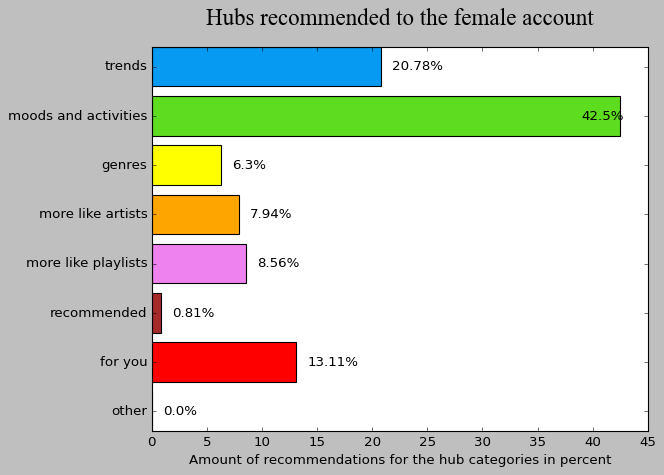

In [34]:
# Plot the hubs for the female account
barplot_hubs(female.groupby('hub_category')['hub_category'].count(), 'female')

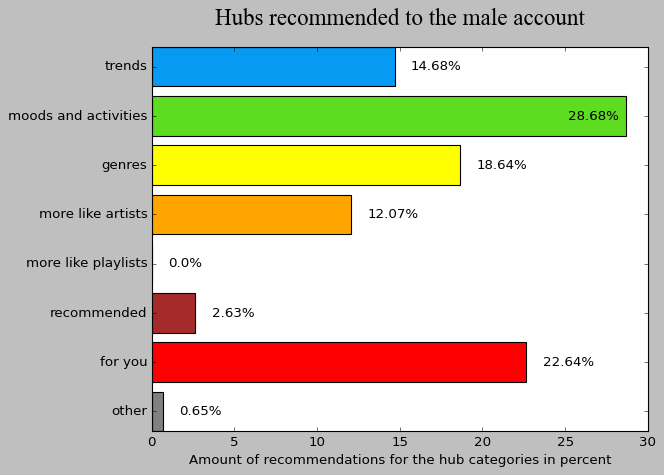

In [35]:
barplot_hubs(male.groupby('hub_category')['hub_category'].count(), 'male')

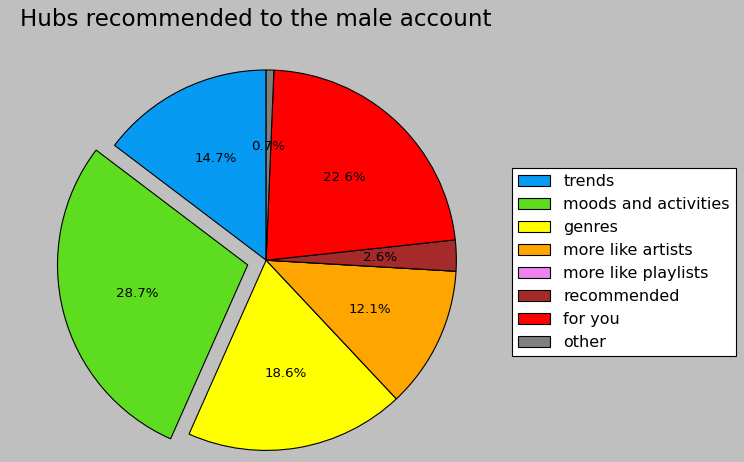

In [36]:
plt.style.use('classic')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cats = male.groupby('hub_category')['hub_category'].count()
cats_labels = list(cats.keys())
labels = hub_labels
sizes = [cats[cats_labels.index(v)] if v in cats_labels else 0 for v in hub_labels]
explode = [0.1 if m == max(sizes) else 0 for m in sizes]

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the male account', loc='center', size='xx-large', pad=40)
wedges, texts, autotexts = ax1.pie(sizes, autopct=my_autopct, startangle=90, textprops={'color':"black"}, explode=explode, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1), labelcolor='k')

plt.savefig('data/visual/male_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

How many hubs did they receive?

In [37]:
male_hubs = male[['day', 'time', 'hub name']]

# Drop amount of times each hub has been recommended and instead calculate each hub's appearance once per daytime it appears
male_hubs = male_hubs.drop_duplicates()
male_hubs = male_hubs.reset_index().drop('index', axis=1)
male_hubs['hub count'] = male_hubs.groupby('hub name')['hub name'].transform('count')
male_hubs['hub percent'] = pd.to_numeric((male_hubs['hub count']/len(male_hubs))*100)

# Categorization of playlists

In [38]:
# Reading the categories and creating variables from it
with open('functional/category.json', 'r') as f:
    test = json.load(f)

global_trends = set(test['global_trends'])
local_trends = set(test['local_trends'])
genres = set(test['genres'])
moods = set(test['moods'])
artists = set(test['artists'])
for_you = set(test['for_you'])
other = set(test['other'])

values = ['global trends', 'local trends', 'genres', 'moods and activities','artists and songs','for you','other']

Below I create the tagging; those functions are key

In [39]:
# Creating category in female df
conditions=[
    (female['playlist name'].isin(global_trends)),
    (female['playlist name'].isin(local_trends)),
    (female['playlist name'].isin(genres)),
    (female['playlist name'].isin(moods)),
    (female['playlist name'].isin(artists)),
    (female['playlist name'].isin(for_you)),
    (female['playlist name'].isin(other))
    ]

female['category'] = np.select(conditions, values)


In [40]:
# Creating category in male df
conditions=[
    (male['playlist name'].isin(global_trends)),
    (male['playlist name'].isin(local_trends)),
    (male['playlist name'].isin(genres)),
    (male['playlist name'].isin(moods)),
    (male['playlist name'].isin(artists)),
    (male['playlist name'].isin(for_you)),
    (male['playlist name'].isin(other))
    ]

male['category'] = np.select(conditions, values)

In [41]:
def my_autopct2(pct):
    return ('%1.1f%%' % pct) if pct > 5.0 else ''

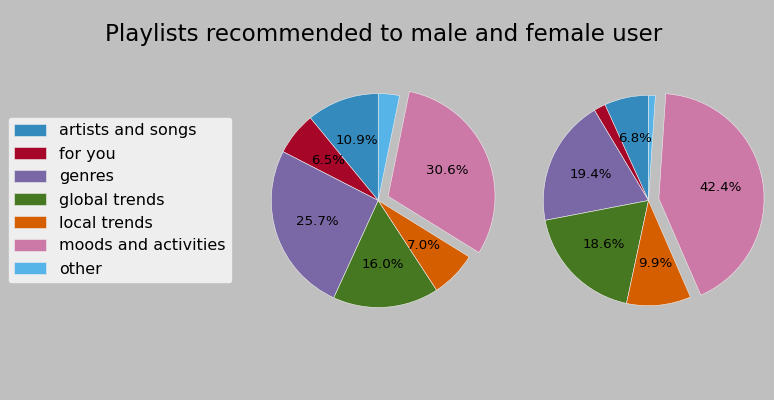

In [42]:
# Plotting the playlists after categories
sizes_m = male.groupby('category')['category'].count().to_list()
sizes_f = female.groupby('category')['category'].count().to_list()
explode_m = [0.1 if m == max(sizes_m) else 0 for m in sizes_m]
explode_f = [0.1 if m == max(sizes_f) else 0 for m in sizes_f]
plt.style.use('bmh')

#plt.figure(dpi=1200)

fig1, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Playlists recommended to male and female user', loc='center', pad=-30, size='xx-large')

wedges, texts, autotexts = ax1.pie(sizes_m, autopct=my_autopct2, startangle=90, textprops={'color':"black"}, explode=explode_m)
ax2.pie(sizes_f, autopct=my_autopct2, startangle=90, textprops={'color':"black"}, explode=explode_f)
ax1.axis('equal')
ax2.axis('equal')

leg = ax1.legend(wedges, list(male.groupby('category')['category'].count().keys()),
          loc="center left",
          bbox_to_anchor=(-1.2, 0, 100, 1), labelcolor='k')


plt.savefig('data/visual/playlists.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [43]:
male.groupby('category')['category'].count()#.keys()

category
artists and songs        370
for you                  220
genres                   869
global trends            541
local trends             236
moods and activities    1035
other                    108
Name: category, dtype: int64

In [44]:
colors = ['pink','blue','purple','green','orange','red','lightblue']

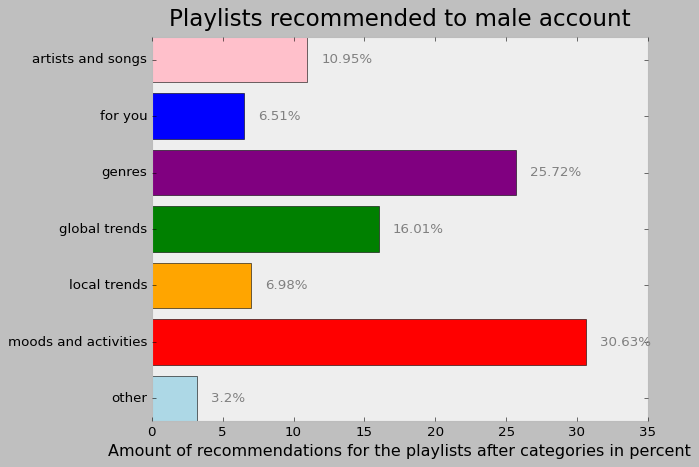

In [45]:
m = male.groupby('category')['category'].count()
sizes_m = m.to_list()
plt.barh(list(m.keys()), [round((s/sum(sizes_m))*100, 2) for s in sizes_m], color=colors, edgecolor='black')
plt.title('Playlists recommended to male account', loc='center', pad=10, size='xx-large')
plt.xlabel('Amount of recommendations for the playlists after categories in percent')
for i, v in enumerate([round((s/sum(sizes_m))*100, 2) for s in sizes_m]):
    plt.text(v + 1, i, str(v)+'%', va='center', color='grey')

plt.gca().invert_yaxis()
plt.grid(False)
plt.savefig('data/visual/mbarplaylists.jpg', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

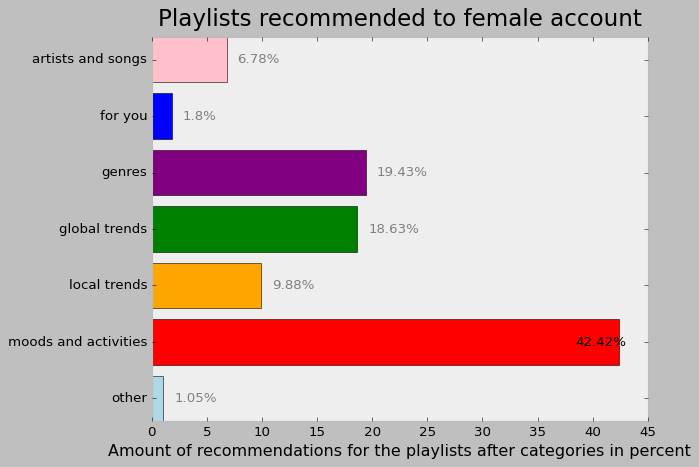

In [46]:
f = female.groupby('category')['category'].count()
sizes_f = f.to_list()
plt.barh(list(f.keys()), [round((s/sum(sizes_f))*100, 2) for s in sizes_f], color=colors, edgecolor='black')
plt.title('Playlists recommended to female account', loc='center', pad=10, size='xx-large')
plt.xlabel('Amount of recommendations for the playlists after categories in percent')

for i, v in enumerate([round((s/sum(sizes_f))*100, 2) for s in sizes_f]):
    if i != 5:
        plt.text(v + 1, i, str(v)+'%', va='center', color='grey')
    else:
        plt.text(v - 4, i, str(v)+'%', va='center', color='black')


plt.gca().invert_yaxis()
plt.grid(False)
plt.savefig('data/visual/fbarplaylists.jpg', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [47]:
# Percentage to which the female account got moods and activities playlists recommended
g = len(female[['playlist name', 'playlist count']][female['category'] == 'moods and activities'])
s = female[['playlist name', 'playlist count']][female['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head(20)

s['total percentage in %'] = round((female['playlist count'] / g)*100, 2).astype(str) + '%'

s

,playlist name,playlist count,total percentage in %
27,songs to sing in the shower,89,5.65%
19,lofi beats,72,4.57%
18,peaceful piano,65,4.12%
84,instrumental study,54,3.43%
51,summer 22,49,3.11%
21,vibes,48,3.05%
17,t koffiehuis,45,2.86%
20,easy 80s,45,2.86%
70,life sucks,42,2.66%
172,cardio,38,2.41%


In [48]:
# Which genre playlists did the female account get recommended the most?
female[['playlist name', 'playlist count']][female['category'] == 'genres'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
178,fresh pop,59
8,rock classics,42
54,techno bunker,41
47,baila reggaeton,34
402,pop sauce,34


In [49]:
# Which modds and activities playlists did the female account get recommended the most?
x = female[['playlist name', 'playlist count']][female['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head(20)
x['playlist count'] = x['playlist count'].apply(lambda y: round((y/x['playlist count'].sum())*100,2))
x


,playlist name,playlist count
27,songs to sing in the shower,10.08
19,lofi beats,8.15
18,peaceful piano,7.36
84,instrumental study,6.12
51,summer 22,5.55
21,vibes,5.44
17,t koffiehuis,5.10
20,easy 80s,5.10
70,life sucks,4.76
172,cardio,4.30


In [50]:
# Which modds and activities playlists did the male account get recommended the most?
x = male[['playlist name', 'playlist count']][male['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head(20)
x['playlist count'] = x['playlist count'].apply(lambda y: round((y/x['playlist count'].sum())*100,2))
x

,playlist name,playlist count
10,t koffiehuis,10.41
58,chill hits,7.55
59,happy tunes,6.94
203,throwback party,6.53
76,songs to sing in the shower,6.33
732,mood booster,6.33
86,summer 22,5.92
136,happy mix,5.51
217,feeling good feeling great,5.31
67,top hits workout,4.90


In [51]:
# Playlists made for studying as indicated through their titles, description or images
l = [
 'lofi beats',
 'intense studying',
 'instrumental study',
 'maximum concentration',
 'homework motivation',
 'reading soundtrack',
 'homework vibes',
 ]

In [52]:
# How many concentration playlists did the female account get recommended?
concentration = female[['playlist name', 'playlist count']][female['playlist name'].isin(l)].drop_duplicates().sort_values(by='playlist count', ascending=False)
(concentration['playlist count'].sum()/len(female[['playlist name', 'playlist count','category']][female['category'] == 'moods and activities']))*100

13.895939086294415

In [53]:
# Looking at the top 20 most frequently recommended moods and activity playlists
x = female[['playlist name', 'playlist count','category']][female['category'] == 'moods and activities'].drop_duplicates()
x.sort_values(by='playlist count', ascending=False).head(20)

,playlist name,playlist count,category
27,songs to sing in the shower,89,moods and activities
19,lofi beats,72,moods and activities
18,peaceful piano,65,moods and activities
84,instrumental study,54,moods and activities
51,summer 22,49,moods and activities
21,vibes,48,moods and activities
17,t koffiehuis,45,moods and activities
20,easy 80s,45,moods and activities
70,life sucks,42,moods and activities
172,cardio,38,moods and activities


In [54]:
# Counting how much percent of moods and activities playlists the concentration playlists account for
c = female[['playlist name', 'playlist count']][female['playlist name'].isin(l)].drop_duplicates()
calc = (c['playlist count'].sum()/len(female[['playlist name', 'playlist count','category']][female['category'] == 'moods and activities']))*100
print(f'They accounted for {calc}% of all moods and activities playlists for the female user')

They accounted for 13.895939086294415% of all moods and activities playlists for the female user


In [55]:
# Counting how much percent of moods and activities playlists the concentration playlists account for
c = male[['playlist name', 'playlist count']][male['playlist name'].isin(l)].drop_duplicates()
calc = (c['playlist count'].sum()/len(male[['playlist name', 'playlist count','category']][male['category'] == 'moods and activities']))*100
print(f'They accounted for {calc}% of all moods and activities playlists for the male user')


They accounted for 2.318840579710145% of all moods and activities playlists for the male user


In [56]:
x = male[['playlist name', 'playlist count']].drop_duplicates()
((37+49)/sum(x['playlist count']))*100

2.519777322004102

In [57]:
# Female amount of different playlists
for v in values:
    print(v,'\t',len(female['playlist name'][female['category'] == v].drop_duplicates()))
print('Total: \t', len(female['playlist name'].unique()))

global trends 	 27
local trends 	 17
genres 	 53
moods and activities 	 83
artists and songs 	 44
for you 	 9
other 	 4
Total: 	 237


In [58]:
for v in values:
    print(v,'\t',len(male['playlist name'][male['category'] == v].drop_duplicates()))
print('Total: \t', len(male['playlist name'].unique()))

global trends 	 30
local trends 	 27
genres 	 84
moods and activities 	 118
artists and songs 	 63
for you 	 10
other 	 15
Total: 	 347


In [59]:
(347/238)*100

119 - 85

34

### Genres

In [17]:
rock = ['rock classic', 'soft rock', 'rock classics', 'rock party', '80s rock anthems','70s rock anthems','00s rock anthems','90s rock anthems','80s soft anthems', 'full volume','pure rock roll',
'10s pop rock', 'best of rock 2013', 'best of rock 2012', '00s soft rock', '10s soft rock', 'beats of rock 2012', 'beats of rock 2014']
regional = ['latin hit mix', 'kpop xovers', 'girl krush', 'hallyu boy bands', 'reggaeton mix', 'reggae classics', 'kclub party', 'latin pop classics', 'kpop mix', 'classic afropop'
'afropop', 'baila reggaeton', '	desi hits', 'african heat', 'kpop on', 'salsa classics', '10s latino', 'leyendas urbanas', 'sing along kpop', 'latin flavor', 'future hits latin',
'new music friday latin', 'salsa nation']
pop = ['love pop', 'singalong indie hits', 'fresh pop', 'pop rising', 'soft pop hits', 'pop mix', 'pop remix','chill pop','chilled pop mix','pop sauce', 
'women of pop', 'classic pop picks',]
electronic = ['summer dance hits', 'big room dance', 'deephouse delight', 'techno bunker', 'hardstyle bangers', 'hot new dance','deep house relax', '360 dance', 'mint', 'deep house rules']
hip_hop = ['i love my 90s hiphop', 'rapcaviar', 'woordenschat', 'best rap songs of 2017', 'energy booster hiphop', 'its lit', 'best hiphop songs of 2020',
'rap uk', 'best rap songs of 2019']
jazz = ['jazz classics', 'state  of jazz','jazz vibes','coffee table jazz']
rnb = ['are be', 'i love my 2000s rb', 'chilled rb', 'rb mix', 'i love my 00s rn']
classical = ['classial new releases']
country = ['hot country']
other = ['alternative all lined up', 'feel good acoustic', 'acoustic favorites', 'classic acoustic']

values = ['rock', 'regional', 'pop', 'electronic', 'hip_hop', 'jazz', 'rnb', 'classical', 'country', 'other']

In [18]:
conditions=[
    (female['playlist name'].isin(rock)),
    (female['playlist name'].isin(regional)),
    (female['playlist name'].isin(pop)),
    (female['playlist name'].isin(electronic)),
    (female['playlist name'].isin(hip_hop)),
    (female['playlist name'].isin(jazz)),
    (female['playlist name'].isin(rnb)),
    (female['playlist name'].isin(classical)),
    (female['playlist name'].isin(country)),
    (female['playlist name'].isin(other))
    ]

female['genre'] = np.select(conditions, values)

In [19]:
conditions=[
    (male['playlist name'].isin(rock)),
    (male['playlist name'].isin(regional)),
    (male['playlist name'].isin(pop)),
    (male['playlist name'].isin(electronic)),
    (male['playlist name'].isin(hip_hop)),
    (male['playlist name'].isin(jazz)),
    (male['playlist name'].isin(rnb)),
    (male['playlist name'].isin(classical)),
    (male['playlist name'].isin(country)),
    (male['playlist name'].isin(other))
    ]

male['genre'] = np.select(conditions, values)

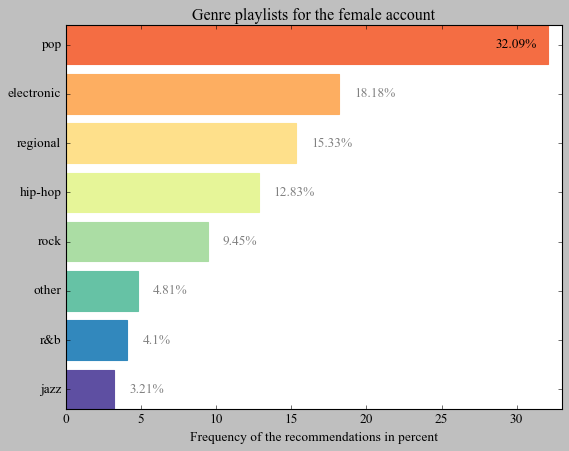

In [22]:
#font =  {'fontname':'Times New Roman'}
color=['#5e4fa2', '#3288bd', '#66c2a5', '#abdda4', '#e6f598', '#fee08b', '#fdae61', '#f46d43']
plotdf = female[['genre', 'playlist count']][female['genre'] != '0'].drop_duplicates()
plotdf['percent'] = round((plotdf.groupby('genre')['playlist count'].transform('sum')/plotdf['playlist count'].sum())*100, 2)
plotdf = plotdf[['genre', 'percent']].drop_duplicates()
plotdf.sort_values(by='percent', ascending=True, inplace=True)


fig, ax = plt.subplots()
barlist = ax.barh(list(map(lambda x: x.replace('rnb', 'r&b').replace('hip_hop', 'hip-hop'), list(plotdf['genre']))), list(plotdf['percent']))

for i, bar in enumerate(barlist):
    barlist[i].set_color(color[i])

ax.set_title('Genre playlists for the female account')
ax.set_xlabel('Frequency of the recommendations in percent')
ax.set_xlim(0,33)

# Add labels
for i, v in enumerate(list(plotdf['percent'])):
    if i < 7:
        ax.text(v + 1, i, str(v)+'%', va='center', color='grey')
    else:
        ax.text(v - 3.5, i, str(v)+'%', va='center', color='black')

plt.grid(False)
plt.savefig('data/visual/fgenres.jpg', dpi=300, bbox_inches="tight")
plt.show()


In [21]:
['pop', 'electronic', 'regional', 'hip hop', 'rock', 'other', 'r&b', 'jazz'][::-1]

['jazz', 'r&b', 'other', 'rock', 'hip hop', 'regional', 'electronic', 'pop']

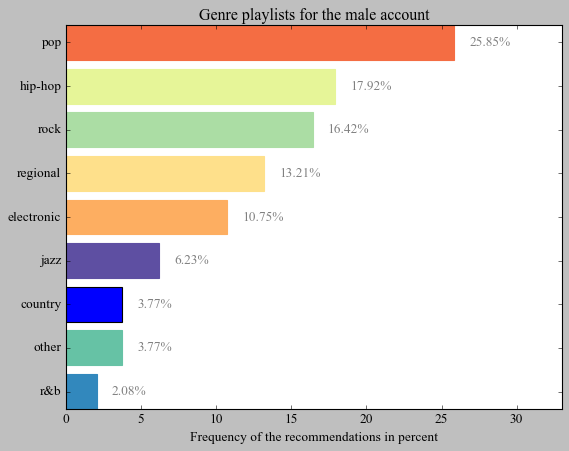

In [23]:
plotdf = male[['genre', 'playlist count']][male['genre'] != '0'].drop_duplicates()
plotdf['percent'] = round((plotdf.groupby('genre')['playlist count'].transform('sum')/plotdf['playlist count'].sum())*100, 2)
plotdf = plotdf[['genre', 'percent']].drop_duplicates()
plotdf.sort_values(by='percent', ascending=True, inplace=True)

fig, ax = plt.subplots()

barlist = ax.barh(list(map(lambda x: x.replace('rnb', 'r&b').replace('hip_hop', 'hip-hop'), list(plotdf['genre']))), list(plotdf['percent']))
barlist[-1].set_color(color[-1])
barlist[-2].set_color(color[-4])
barlist[-3].set_color(color[3])
barlist[-4].set_color(color[-3])
barlist[-5].set_color(color[-2])
barlist[-6].set_color(color[0])
barlist[-8].set_color(color[2])
barlist[-9].set_color(color[1])

ax.set_title('Genre playlists for the male account')
ax.set_xlabel('Frequency of the recommendations in percent')
ax.set_xlim(0,33)


# Add labels
for i, v in enumerate(list(plotdf['percent'])):
    ax.text(v + 1, i, str(v)+'%', va='center', color='grey')

plt.grid(False)
plt.savefig('data/visual/mgenres.jpg', dpi=300,  bbox_inches="tight")
plt.show()


In [66]:
m = male[male.category == 'genres']
m['playlist count'] = round((m['playlist count']/len(m))*100,2)
m[['playlist name', 'playlist count']].sort_values(by='playlist count', ascending=False).drop_duplicates().head(15)
#len(m)

/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_14305/286280274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['playlist count'] = round((m['playlist count']/len(m))*100,2)


,playlist name,playlist count
2188,fresh pop,5.64
2298,rock classics,4.37
3371,soft pop hits,4.26
1899,afro hits,3.91
565,jazz classics,3.45
3118,360 dance,3.45
3596,pop mix,2.88
1658,baila reggaeton,2.65
2913,reggaeton mix,2.65
3155,rock mix,2.53


In [67]:
f = female[female.category == 'genres']
f['playlist count'] = round((f['playlist count']/len(f))*100,2)

f[['playlist name', 'playlist count']].sort_values(by='playlist count', ascending=False).drop_duplicates().head(15)


/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_14305/1855721310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['playlist count'] = round((f['playlist count']/len(f))*100,2)


,playlist name,playlist count
1752,fresh pop,8.17
2436,rock classics,5.82
4978,techno bunker,5.68
3444,soft pop hits,4.71
3578,baila reggaeton,4.71
1953,pop sauce,4.71
2665,afro hits,4.43
2689,kclub party,4.43
3574,rapcaviar,4.43
2316,classical new releases,4.29


In [68]:
# Checking for mixes

m_mix = male[male['playlist name'].str.endswith(' mix')]
f_mix = female[female['playlist name'].str.endswith(' mix')]

f_mix['playlist count'] = f_mix['playlist count'].apply(lambda y: round((y/f_mix['playlist count'].sum())*100,2))
m_mix['playlist count'] = m_mix['playlist count'].apply(lambda y: round((y/m_mix['playlist count'].sum())*100,2))

m_mix[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False).head(10)
f_mix[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False).head(10)

#display(m_mix.groupby('playlist name').describe(),
#f_mix.groupby('playlist name').describe())

/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_14305/2751170131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_mix['playlist count'] = f_mix['playlist count'].apply(lambda y: round((y/f_mix['playlist count'].sum())*100,2))
/var/folders/l4/sh91w5z5601c5_zm643js55c0000gn/T/ipykernel_14305/2751170131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_mix['playlist count'] = m_mix['playlist count'].apply(lambda y: round((y/m_mix['playlist count'].sum())*100,2))


,playlist name,playlist count
217,mega hit mix,0.94
42,motivation mix,0.89
90,bad bunny mix,0.39
505,ckay mix,0.39
676,jack harlow mix,0.39
507,camila cabello mix,0.33
1428,pink floyd mix,0.33
2421,imagine dragons mix,0.28
89,taylor swift mix,0.25
1427,queen mix,0.25


# Female Empowernment

In [69]:
male[male['hub name'] == 'playlists celebrating women']

,day,time,hub name,playlist name,type,playlist count,hub count,hub_category,category,genre
4167,2022-04-20,22:00:00,playlists celebrating women,feelin myself,playlist,10,10,other,moods and activities,0
4168,2022-04-20,22:00:00,playlists celebrating women,the slaylist,playlist,1,10,other,moods and activities,0
4169,2022-04-20,22:00:00,playlists celebrating women,equal,playlist,1,10,other,other,0
4170,2022-04-20,22:00:00,playlists celebrating women,equal belgium,playlist,1,10,other,other,0
4171,2022-04-20,22:00:00,playlists celebrating women,dope af,playlist,1,10,other,moods and activities,0
4172,2022-04-20,22:00:00,playlists celebrating women,created by women,playlist,1,10,other,other,0
4173,2022-04-20,22:00:00,playlists celebrating women,equal netherlands,playlist,1,10,other,local trends,0
4174,2022-04-20,22:00:00,playlists celebrating women,fierce femmes,playlist,1,10,other,other,0
4175,2022-04-20,22:00:00,playlists celebrating women,iconic arabic women,playlist,1,10,other,other,0
4176,2022-04-20,22:00:00,playlists celebrating women,badass,playlist,1,10,other,moods and activities,0
